In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from operator import add

In [2]:
df1 = pd.read_csv('Dataset.data', header=-1, delim_whitespace=True)

In [3]:
col = ['Sex', 'Length', 'Diameter', 'Height', 'Whole', 'Shucked', 'Viscera', 'Shell', 'Rings']
df1.columns = col

In [4]:
# Target Variable
y = df1['Rings'].values

In [5]:
ind_Sex = pd.get_dummies(df1['Sex'], prefix='Sex')
df2 = pd.concat([ind_Sex, df1.select_dtypes(['float64']), df1.select_dtypes(['int64'])], axis = 1)

In [7]:
def GD(X_train, y_train, X_validation, y_validation, alpha, theta_t):
    RMSEs_train = []
    RMSEs_val = []
    for i in range(1000):
        hypo = np.dot(X_train, theta_t)
        RMSE_train = math.sqrt((1/(2*4177)) * np.dot((hypo-y_train).T, (hypo-y_train)))
        RMSEs_train.append(RMSE_train)
        theta_t = theta_t - (alpha * (1/4177) * np.dot(X_train.T, (hypo-y_train)))
        pred = np.dot(X_validation, theta_t)
        RMSE_validation = math.sqrt((1/(2*4177)) * np.dot((pred-y_validation).T, (pred-y_validation)))
        RMSEs_val.append(RMSE_validation)
    return RMSEs_train, RMSEs_val

In [8]:
def RMSE_eval(folds, df1):
    R_train = []
    R_val = []
    np.random.seed(10)
    theta_t = np.random.rand(11)
    alpha = 0.01
    for i in range(1000):
        RMSEs_train = []
        RMSEs_val = []
        for i in range(folds):
            if i == 0:
                X_train = df1.loc[835*(i+1):, 'Sex_F':'Shell']
                X_train = normalize(X_train)
                X_train['Intercept'] = np.ones(3342)

                y_train = df1.loc[835*(i+1):, 'Rings']
            elif i == 4:
                X_train = df1.loc[:(835*i)-1, 'Sex_F':'Shell']
                X_train = normalize(X_train)
                X_train['Intercept'] = np.ones(3340)

                y_train = df1.loc[:(835*i)-1, 'Rings']
            else:
                X_train = pd.concat([df1.loc[:(835*i)-1, 'Sex_F':'Shell'], df1.loc[835*(i+1):, 'Sex_F':'Shell']], axis=0)
                X_train = normalize(X_train)
                X_train['Intercept'] = np.ones(3342)

                y_train = pd.concat([df1.loc[:(835*i)-1, 'Rings'], df1.loc[835*(i+1):, 'Rings']], axis=0)


            if i == 4:
                X_validation = df1.loc[(835*i):, 'Sex_F':'Shell']
                X_validation = normalize(X_validation)
                X_validation['Intercept'] = np.ones(837)

                y_validation = df1.loc[(835*i):, 'Rings']
            else:
                X_validation = df1.loc[(835*i):(835*(i+1)-1), 'Sex_F':'Shell']
                X_validation = normalize(X_validation)
                X_validation['Intercept'] = np.ones(835)

                y_validation = df1.loc[(835*i):(835*(i+1)-1), 'Rings']

            
            
            hypo = np.dot(X_train, theta_t)
            RMSE_train = math.sqrt((1/(2*len(y_train))) * np.dot((hypo-y_train).T, (hypo-y_train)))
            RMSEs_train.append(RMSE_train)
            theta_t = theta_t - (alpha * (1/len(y_train)) * np.dot(X_train.T, (hypo-y_train)))
            pred = np.dot(X_validation, theta_t)
            RMSE_validation = math.sqrt((1/(2*len(y_validation))) * np.dot((pred-y_validation).T, (pred-y_validation)))
            RMSEs_val.append(RMSE_validation)
        
        R_train.append(np.mean(RMSEs_train))
        R_val.append(np.mean(RMSEs_val))
        
    return R_train, R_val

In [9]:
R_train, R_validation = RMSE_eval(5, df2)

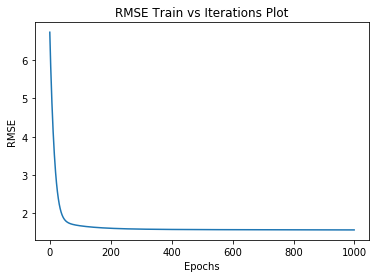

In [10]:
fig1 = plt.figure(1)
plt.plot(R_train)
plt.title('RMSE Train vs Iterations Plot')
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.show()

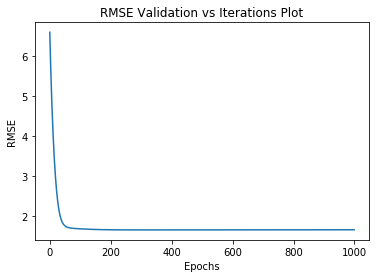

In [11]:
fig2 = plt.figure(1)
plt.plot(R_validation)
plt.title('RMSE Validation vs Iterations Plot')
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.show()